In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

In [2]:
plt.rcParams['figure.figsize']  = (30,7)

In [3]:
dataset = pd.read_csv("Car_Price_Prediction.csv")

In [4]:
dataset.head(50)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
dataset['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [7]:
dataset['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [8]:
dataset['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [9]:
object_columns = [x for x in dataset.columns if dataset[x].dtype=='object']

In [10]:
object_columns

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [11]:
int_columns = [x for x in dataset.columns if dataset[x].dtype=='int64']

In [12]:
float_columns = [x for x in dataset.columns if dataset[x].dtype=='float64']

In [13]:
int_columns

['car_ID',
 'symboling',
 'curbweight',
 'enginesize',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [14]:
float_columns

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'price']

In [15]:
for i in object_columns:
    print(i,len(dataset[i].unique()))

CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


In [16]:
for i in object_columns:
    print("+------------------------------------------+")
    print("  ",i,"---------->",len(dataset[i].unique()))
    print(dataset[i].value_counts())

    print("+------------------------------------------+")
    print("\n")

+------------------------------------------+
   CarName ----------> 147
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
+------------------------------------------+


+------------------------------------------+
   fueltype ----------> 2
gas       185
diesel     20
Name: fueltype, dtype: int64
+------------------------------------------+


+------------------------------------------+
   aspiration ----------> 2
std      168
turbo     37
Name: aspiration, dtype: int64
+------------------------------------------+


+------------------------------------------+
   doornumber ----------> 2
four    115
two      90
Name: doornumber, dtype: int64
+------------------------------------------+


+--------------------------

In [17]:
carbrand = []

for i in dataset['CarName']:
  brand = i.split(" ")[0]
  carbrand.append(brand)

car_brand = pd.DataFrame(carbrand,)


In [18]:
car_brand = car_brand.rename(columns={0:'carbrand'})

In [19]:
car_brand['carbrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
dataset.drop('CarName',axis=1,inplace=True)

In [21]:
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
dataset['CarBrand'] = car_brand['carbrand']

In [23]:
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Checking Null Values

In [24]:
for i in dataset.columns:
  print(i,"  -   ",dataset[i].isnull().sum())

car_ID   -    0
symboling   -    0
fueltype   -    0
aspiration   -    0
doornumber   -    0
carbody   -    0
drivewheel   -    0
enginelocation   -    0
wheelbase   -    0
carlength   -    0
carwidth   -    0
carheight   -    0
curbweight   -    0
enginetype   -    0
cylindernumber   -    0
enginesize   -    0
fuelsystem   -    0
boreratio   -    0
stroke   -    0
compressionratio   -    0
horsepower   -    0
peakrpm   -    0
citympg   -    0
highwaympg   -    0
price   -    0
CarBrand   -    0


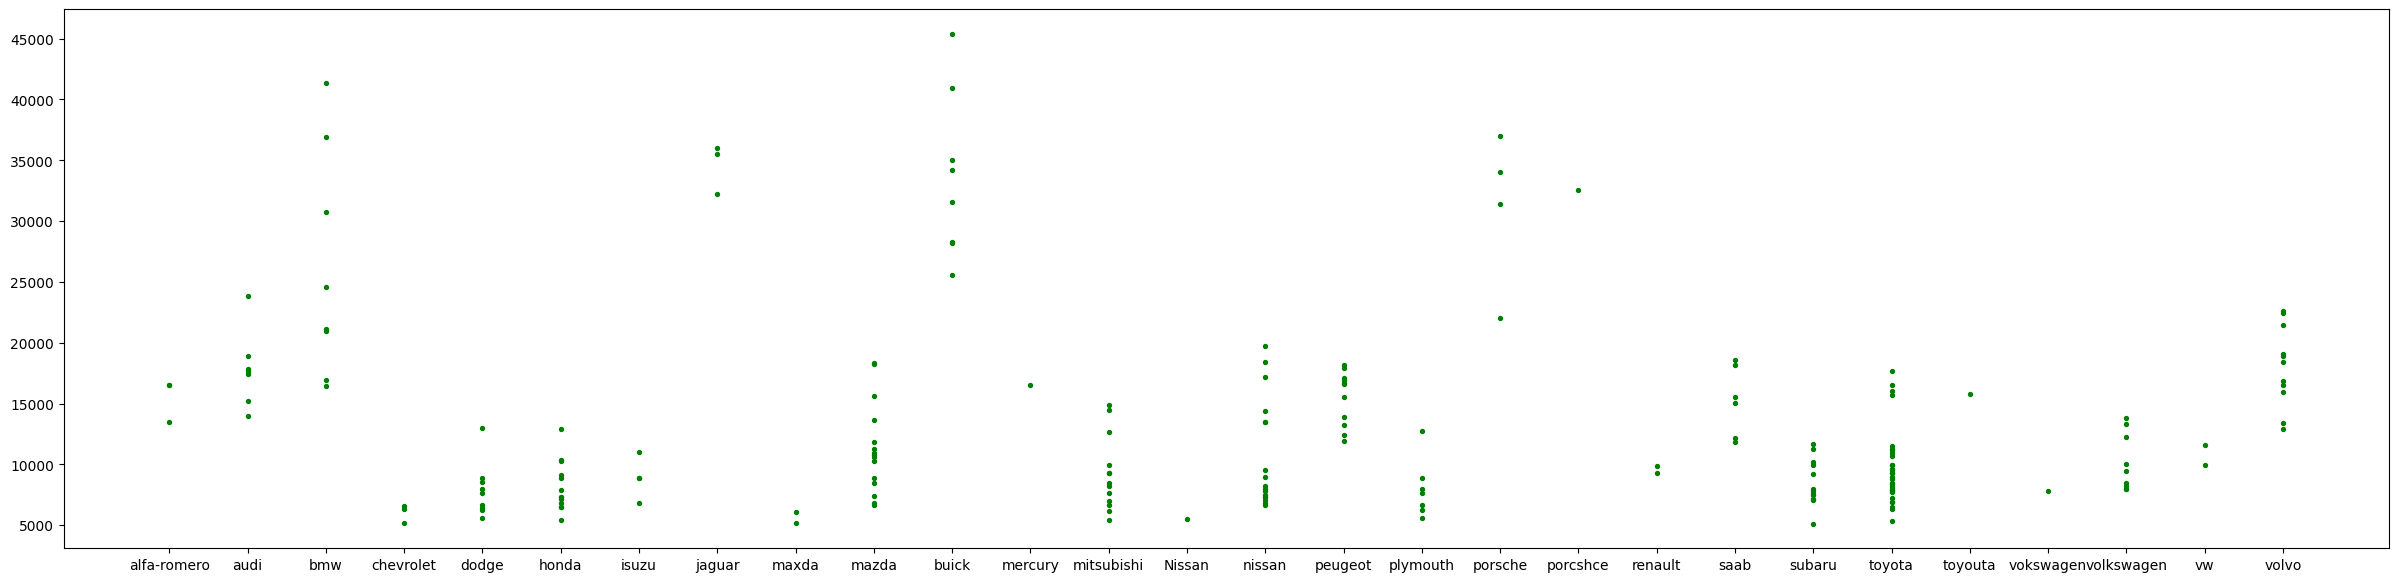

In [25]:
plt.scatter(x=dataset['CarBrand'],y=dataset['price'],c='g',s=8)

### Its clearly seen that brand had influence on price
### therefore it should not be droped

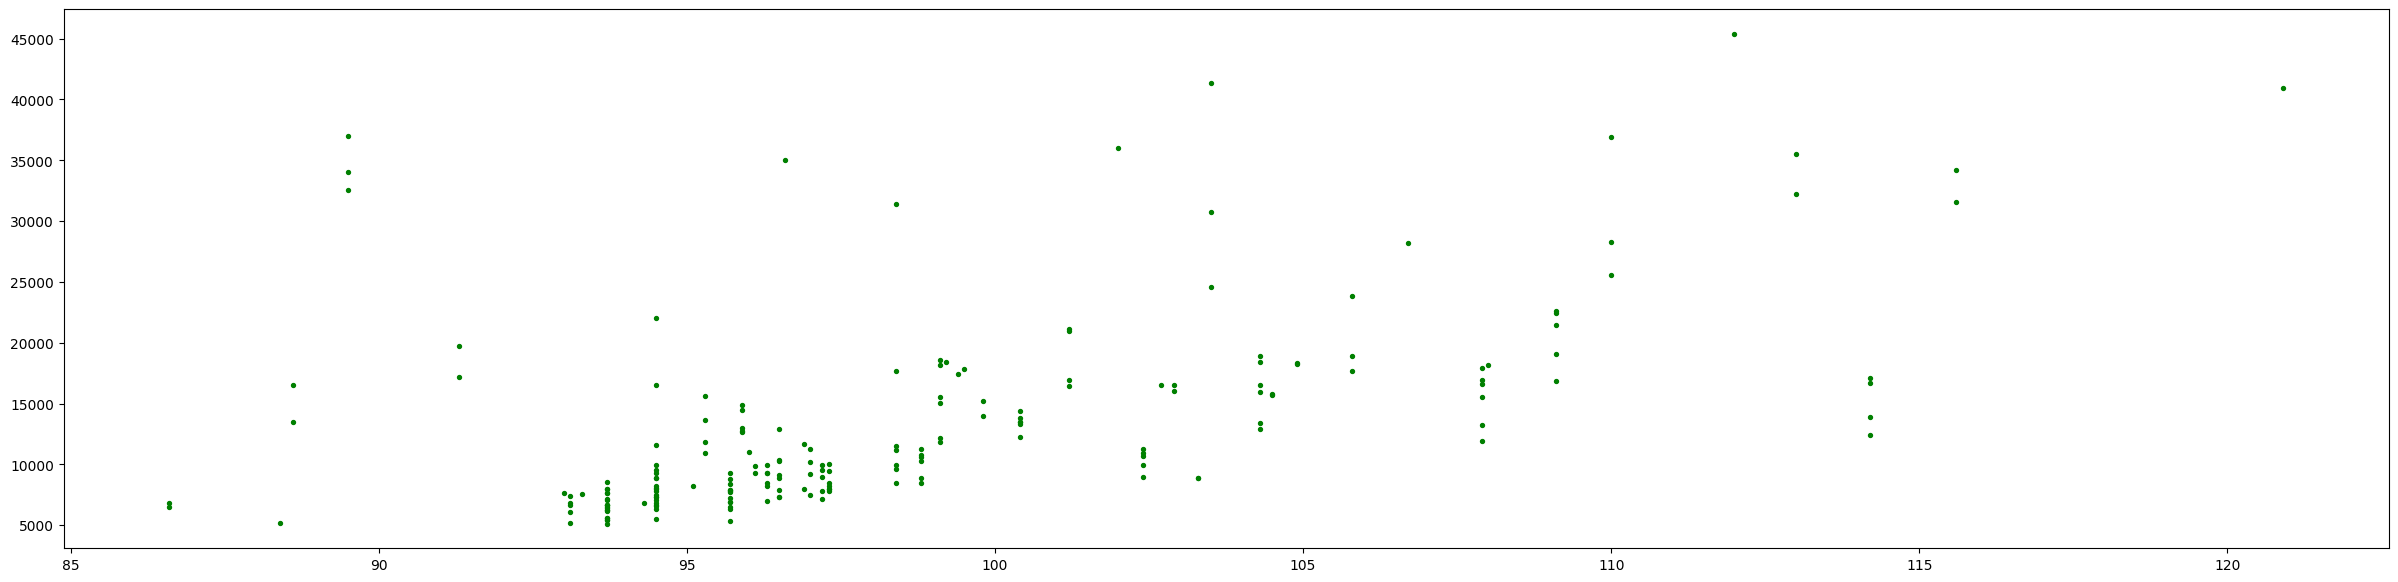

In [26]:
plt.scatter(x=dataset['wheelbase'],y=dataset['price'],c='g',s=8)

In [27]:
dataset['CarBrand'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarBrand, dtype: int64

In [28]:
object_columns = [x for x in dataset.columns if dataset[x].dtype=='object']

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in object_columns:
  dataset[i] = label.fit_transform(dataset[i])

In [30]:
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [32]:
dataset['CarBrand'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11,  4, 12, 13,  0, 14, 15, 16,
       18, 17, 19, 20, 21, 22, 23, 24, 25, 27, 26])

In [33]:
for i in object_columns:
  print(i, dataset[i].value_counts())
  print('\n---------------------------\n')

fueltype 1    185
0     20
Name: fueltype, dtype: int64

---------------------------

aspiration 0    168
1     37
Name: aspiration, dtype: int64

---------------------------

doornumber 0    115
1     90
Name: doornumber, dtype: int64

---------------------------

carbody 3    96
2    70
4    25
1     8
0     6
Name: carbody, dtype: int64

---------------------------

drivewheel 1    120
2     76
0      9
Name: drivewheel, dtype: int64

---------------------------

enginelocation 0    202
1      3
Name: enginelocation, dtype: int64

---------------------------

enginetype 3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: enginetype, dtype: int64

---------------------------

cylindernumber 2    159
3     24
1     11
0      5
6      4
4      1
5      1
Name: cylindernumber, dtype: int64

---------------------------

fuelsystem 5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: fuelsystem, dtype: int64

---------------------------

CarBrand 22    31

In [34]:
dataset['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

In [35]:
Y=dataset['price']

In [36]:
dataset.drop('price',inplace=True,axis=1)

In [37]:
X=dataset

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [39]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

164
41
164
41


In [40]:
X_test

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarBrand
78,79,2,1,0,1,2,1,0,93.7,157.3,64.4,50.8,2004,3,2,92,1,2.97,3.230,9.4,68,5500,31,38,13
97,98,1,1,0,0,4,1,0,94.5,170.2,63.8,53.5,2037,3,2,97,1,3.15,3.290,9.4,69,5200,31,37,14
151,152,1,1,0,1,2,1,0,95.7,158.7,63.6,54.5,2040,3,2,92,1,3.05,3.030,9.0,62,4800,31,38,22
44,45,1,1,0,1,3,1,0,94.5,155.9,63.6,52.0,1874,3,2,90,1,3.03,3.110,9.6,70,5400,38,43,8
40,41,0,1,0,0,3,1,0,96.5,175.4,62.5,54.1,2372,3,2,110,0,3.15,3.580,9.0,86,5800,27,33,7
67,68,-1,0,1,0,3,2,0,110.0,190.9,70.3,56.5,3515,3,1,183,3,3.58,3.640,21.5,123,4350,22,25,4
98,99,2,1,0,1,1,1,0,95.1,162.4,63.8,53.3,2008,3,2,97,1,3.15,3.290,9.4,69,5200,31,37,14
18,19,2,1,0,1,2,1,0,88.4,141.1,60.3,53.2,1488,2,4,61,1,2.91,3.030,9.5,48,5100,47,53,5
152,153,1,1,0,0,2,1,0,95.7,158.7,63.6,54.5,2015,3,2,92,1,3.05,3.030,9.0,62,4800,31,38,22
62,63,0,1,0,0,3,1,0,98.8,177.8,66.5,55.5,2410,3,2,122,1,3.39,3.390,8.6,84,4800,26,32,11


In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred = (reg.predict(X_test))

In [43]:
for i,j in zip(y_pred,y_test):
  print(i,"  ", j,"   ",i-j)

6933.457759532539    6669.0     264.45775953253906
5472.234939569564    7999.0     -2526.7650604304363
5380.70864823024    6338.0     -957.2913517697598
5762.484124188981    8916.5     -3154.015875811019
8278.822593400473    10295.0     -2016.1774065995269
27296.909432543616    25552.0     1744.9094325436163
7544.395060129042    8249.0     -704.6049398709583
753.2843272359896    5151.0     -4397.71567276401
6925.423535887312    6488.0     437.423535887312
11531.280777001855    10245.0     1286.2807770018553
16194.622242671496    17450.0     -1255.3777573285042
14984.023222534277    17669.0     -2684.976777465723
14651.251634352098    16515.0     -1863.7483656479017
10175.388844224755    9095.0     1080.3888442247553
14925.107591051768    12964.0     1961.1075910517684
13238.556612024404    11199.0     2039.5566120244039
5924.063117771468    9980.0     -4055.9368822285323
8628.959627107732    6529.0     2099.9596271077316
14159.736312882655    18150.0     -3990.2636871173454
9676.586375

In [44]:
y_test

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
67     25552.0
98      8249.0
18      5151.0
152     6488.0
62     10245.0
4      17450.0
172    17669.0
197    16515.0
38      9095.0
29     12964.0
170    11199.0
190     9980.0
33      6529.0
136    18150.0
145    11259.0
173     8948.0
31      6855.0
11     16925.0
119     7957.0
169     9989.0
34      7129.0
84     14489.0
184     7995.0
120     6229.0
35      7295.0
163     8058.0
28      8921.0
16     41315.0
130     9295.0
116    17950.0
182     7775.0
27      8558.0
47     32250.0
58     15645.0
204    22625.0
138     5118.0
Name: price, dtype: float64

In [45]:
import tensorflow as tf

In [46]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [47]:
ann.compile(optimizer = 'adam' , loss='mean_squared_error')
ann.fit(X_train,y_train,epochs=500,batch_size=50)

Epoch 1/500
4/4 [==============================] - 1s 6ms/step - loss: 272384704.0000
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 263507968.0000
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 254952368.0000
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 246763328.0000
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 238326512.0000
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 230055632.0000
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 221550224.0000
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 213395264.0000
Epoch 9/500
4/4 [==============================] - 0s 6ms/step - loss: 204511824.0000
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 195530560.0000
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 186280704.0000
Epoch 12/500
4/4 [==============================] - 

In [48]:
y_pred_ann = ann.predict(X_test)
for i,j in zip(y_pred_ann,y_test):
  print(i,j,(i-j))

2/2 [==============================] - 0s 7ms/step
[6895.553] 6669.0 [226.55322]
[7040.842] 7999.0 [-958.1582]
[6490.4116] 6338.0 [152.41162]
[6648.993] 8916.5 [-2267.5068]
[10234.178] 10295.0 [-60.822266]
[26622.744] 25552.0 [1070.7441]
[6930.9644] 8249.0 [-1318.0356]
[5333.453] 5151.0 [182.45312]
[6312.6626] 6488.0 [-175.3374]
[11658.14] 10245.0 [1413.1396]
[17371.498] 17450.0 [-78.50195]
[16752.393] 17669.0 [-916.6074]
[14781.466] 16515.0 [-1733.5342]
[9739.015] 9095.0 [644.01465]
[19344.084] 12964.0 [6380.084]
[13807.361] 11199.0 [2608.3613]
[7601.375] 9980.0 [-2378.625]
[7465.546] 6529.0 [936.5459]
[14891.108] 18150.0 [-3258.8916]
[11445.866] 11259.0 [186.86621]
[9969.02] 8948.0 [1021.01953]
[7144.7563] 6855.0 [289.75635]
[11337.942] 16925.0 [-5587.0576]
[8145.7964] 7957.0 [188.79639]
[12513.25] 9989.0 [2524.25]
[7500.582] 7129.0 [371.58203]
[19233.418] 14489.0 [4744.418]
[7096.986] 7995.0 [-898.01416]
[6495.6655] 6229.0 [266.66553]
[7571.153] 7295.0 [276.15283]
[7547.834] 8058.0 

In [49]:
plt.rcParams['figure.figsize']  = (6,6)

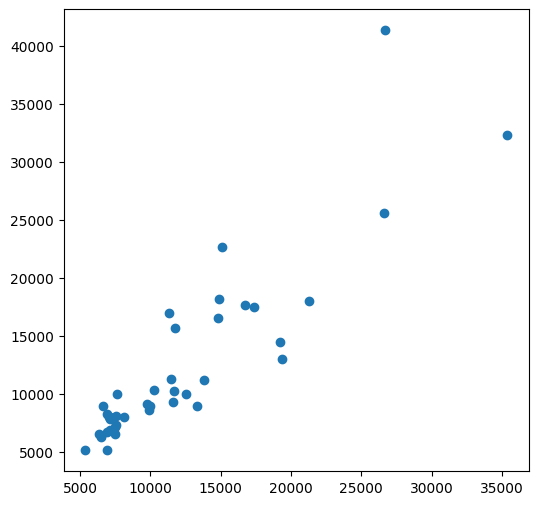

In [50]:
plt.scatter(y_pred_ann,y_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_pred_ann,y_test)

0.7207345202332631